In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [4]:
salary_data = pd.read_csv("salary_data.csv")

In [9]:
salary_data.head()

NAME                       JOBTITLE  DEPTID  \
0         Aaron,Kareem D        Utilities Inst Repair I  A50550   
1       Aaron,Patricia G  Facilities/Office Services II  A03031   
2          Abadir,Adam O             Council Technician  A02002   
3  Abaku,Aigbolosimuan O                 Police Officer  A99094   
4          Abbeduto,Mack     Assistant State's Attorney  A29011   

                           DESCR                 HIRE_DT  ANNUAL_RT     Gross  
0  DPW-Water & Waste Water (550)  08/27/2018 12:00:00 AM    32470.0  25743.94  
1       OED-Employment Dev (031)  10/24/1979 12:00:00 AM    60200.0  57806.13  
2             City Council (002)  12/12/2016 12:00:00 AM    64823.0  64774.11  
3        Police Department (094)  04/17/2018 12:00:00 AM    53640.0  59361.55  
4  States Attorneys Office (011)  05/22/2017 12:00:00 AM    68562.0  61693.59

In [41]:
salary_data.dropna(axis=0, how='any')

NAME                       JOBTITLE  DEPTID  \
0             Aaron,Kareem D        Utilities Inst Repair I  A50550   
1           Aaron,Patricia G  Facilities/Office Services II  A03031   
2              Abadir,Adam O             Council Technician  A02002   
3      Abaku,Aigbolosimuan O                 Police Officer  A99094   
4              Abbeduto,Mack     Assistant State's Attorney  A29011   
...                      ...                            ...     ...   
13806            Zou,Zhi Fan         Police Officer Trainee  A99163   
13807   Zovistoski,Zachary D                 Police Officer  A99006   
13808      Zuhoski,Timothy C             Police Officer EID  A99196   
13809         Zuniga,Linette      Community Outreach Worker  A65527   
13810           Zyla,David C   Emergency Medical Technician  A64462   

                               DESCR    HIRE_DT  ANNUAL_RT     Gross  \
0      DPW-Water & Waste Water (550) 2018-08-27    32470.0  25743.94   
1           OED-Employment Dev (031) 1979-10-24    60200.0  57806.13   
2                 City Council (002) 2016-12-12    64823.0  64774.11   
3            Police Department (094) 2018-04-17    53640.0  59361.55   
4      States Attorneys Office (011) 2017-05-22    68562.0  61693.59   
...                              ...        ...        ...       ...   
13806        Police Department (163) 2018-04-11    53512.0  39631.51   
13807        Police Department (006) 2013-12-17    72254.0  76767.33   
13808        Police Department (196) 2017-01-31    55526.0  65534.27   
13809   HLTH-Health Department (527) 2016-10-20    30279.0  26655.90   
13810          Fire Department (462) 2018-09-19    34298.0  26145.80   

       Experience  
0             1.0  
1            40.0  
2             3.0  
3             1.0  
4             2.0  
...           ...  
13806         2.0  
13807         6.0  
13808         3.0  
13809         3.0  
13810         1.0  

[13154 rows x 8 columns]

In [42]:
salary_data['HIRE_DT'] = pd.to_datetime(salary_data['HIRE_DT'])

In [43]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13811 entries, 0 to 13810
Data columns (total 8 columns):
NAME          13811 non-null object
JOBTITLE      13811 non-null object
DEPTID        13811 non-null object
DESCR         13811 non-null object
HIRE_DT       13807 non-null datetime64[ns]
ANNUAL_RT     13811 non-null float64
Gross         13158 non-null float64
Experience    13807 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 863.3+ KB


In [44]:
today = datetime.datetime.now()

In [45]:
salary_data['Experience'] = (today - salary_data['HIRE_DT']).astype('<m8[Y]')

In [46]:
# salary_data.head(20)

In [47]:
salary = salary_data['ANNUAL_RT'].values
experience = salary_data['Experience'].values

In [48]:
experience

array([ 1., 40.,  3., ...,  3.,  3.,  1.])

/home/numan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/numan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


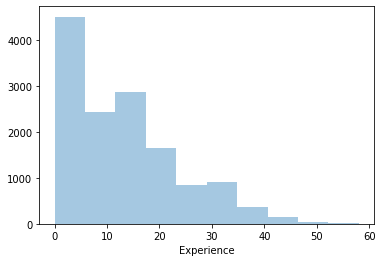

In [54]:
sns.distplot(salary_data['Experience'], kde=False, bins=10)

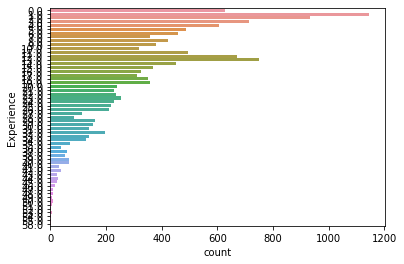

In [50]:
sns.countplot(y="Experience", data=salary_data)

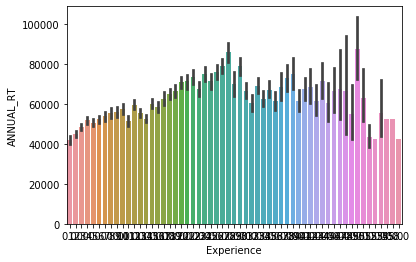

In [52]:
sns.barplot(x="Experience", y='ANNUAL_RT', data=salary_data)

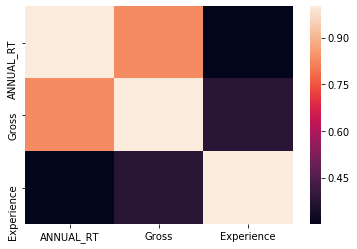

In [53]:
sns.heatmap(salary_data.corr())

#### Training Data

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(salary, experience, test_size=1/3, random_state=0)

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[32227. 75054. 73193. ... 63751. 37543. 46395.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.